In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [9]:
def load_histories(paths, prefix=None):
    result = []
    processed_paths = []
    for p in paths:
        if prefix:
            p = os.path.join(prefix, p)
        processed_paths.extend(glob.glob(p))
    for p in processed_paths:
        hist_file = os.path.join(p, "history.npy")
        if os.path.exists(hist_file):
            name = os.path.basename(p)
            data = np.load(hist_file, allow_pickle=True).item()
            data["name"] = name
            result.append(data)
        else:
            hist_file = os.path.join(p, "history.npz")
            if os.path.exists(hist_file):
                name = os.path.basename(p)
                data = np.load(hist_file)
                data = {
                    "train":data["train_loss"],
                    "val":data["val_loss"],
                    "name":name,
                }
                result.append(data)
    return result

In [10]:
data_directory_prefix = None
result_list = [
    "/media/DATA_18_TB_1/daniel_s/cgschnet/Majewski_prior_2024.07.06/model_*",
    ]

data = load_histories(result_list, data_directory_prefix)

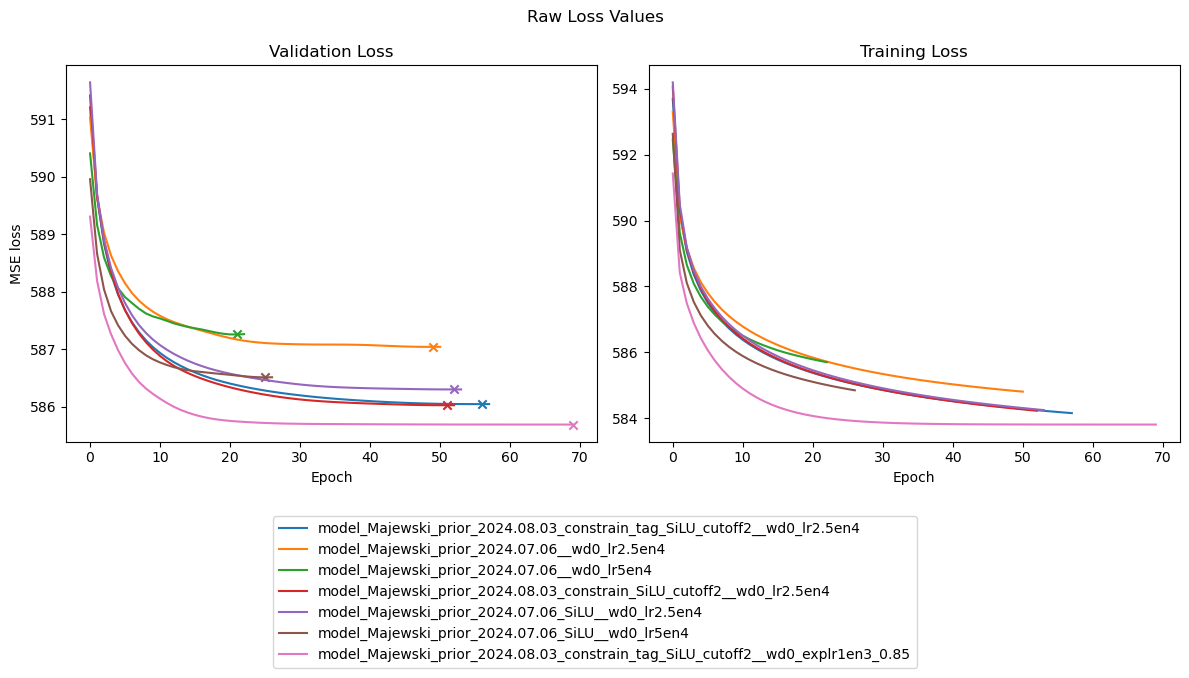

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Raw Loss Values')

best_val_loss = []

for history in data:
    train_loss_list = np.array(history['train'])
    val_loss_list = np.array(history['val'])

    ax1.plot(val_loss_list, label=history['name'])

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("MSE loss")
    ax1.set_title(f"Validation Loss")

    ax2.plot(train_loss_list)

    ax2.set_xlabel("Epoch")
    ax2.set_title(f"Training Loss")

    best_idx = np.argmin(val_loss_list)
    best_val_loss.append((best_idx, val_loss_list[best_idx]))

# Mark the lowest validation loss with an x
for x, y in best_val_loss:
    ax1.scatter([x],[y],marker="x")

fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05*len(data)))
pass

In [12]:
title_width = max([len(i["name"]) for i in data]) + 1

print("*** Best Epoch By Validation Loss ***\n")
print("Model".ljust(title_width),"Epoch", "  Val Loss", "    Train Loss")
for history in data:
    train_loss_list = np.array(history['train'])
    val_loss_list = np.array(history['val'])
    best_idx = np.argmin(val_loss_list)
    best_val_loss = val_loss_list[best_idx]
    train_loss = train_loss_list[best_idx]
    print(history['name'].ljust(title_width),f"{best_idx:5}",f"  {best_val_loss:.6f}",f"  {train_loss:.6f}")

*** Best Epoch By Validation Loss ***

Model                                                                           Epoch   Val Loss     Train Loss
model_Majewski_prior_2024.08.03_constrain_tag_SiLU_cutoff2__wd0_lr2.5en4           56   586.046104   584.171461
model_Majewski_prior_2024.07.06__wd0_lr2.5en4                                      49   587.041980   584.826190
model_Majewski_prior_2024.07.06__wd0_lr5en4                                        21   587.257037   585.742254
model_Majewski_prior_2024.08.03_constrain_SiLU_cutoff2__wd0_lr2.5en4               51   586.026640   584.247143
model_Majewski_prior_2024.07.06_SiLU__wd0_lr2.5en4                                 52   586.301355   584.267162
model_Majewski_prior_2024.07.06_SiLU__wd0_lr5en4                                   25   586.511525   584.883866
model_Majewski_prior_2024.08.03_constrain_tag_SiLU_cutoff2__wd0_explr1en3_0.85     69   585.690497   583.807579


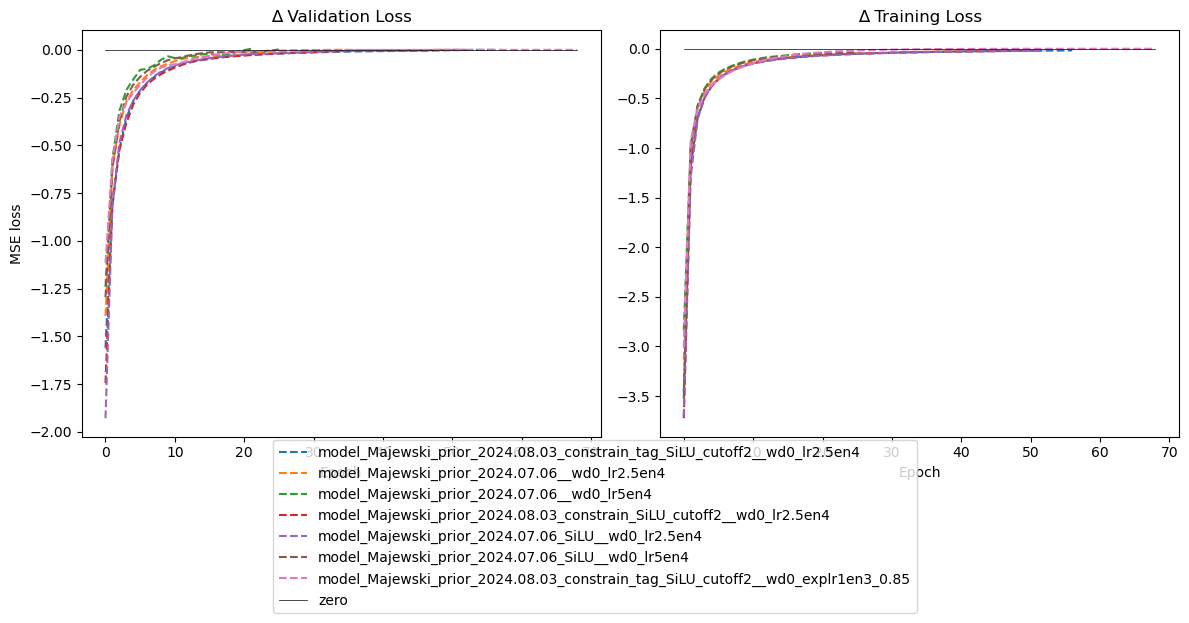

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for history in data:
    train_loss_list = np.array(history['train'])
    val_loss_list = np.array(history['val'])

    max_epoch = 0
    delta_train_loss_list = train_loss_list[1:] - train_loss_list[:-1]
    delta_val_loss_list = val_loss_list[1:] - val_loss_list[:-1]
    max_epoch = max(max_epoch, len(delta_val_loss_list))

    ax1.plot(delta_val_loss_list, label=history['name'], linestyle="--")

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("MSE loss")
    ax1.set_title(f"∆ Validation Loss")

    ax2.plot(delta_train_loss_list, linestyle="--")

    ax2.set_xlabel("Epoch")
    ax2.set_title(f"∆ Training Loss")

ax1.plot([0]*max_epoch, label=f"zero", linestyle="-", color="black", linewidth='0.5')
ax2.plot([0]*max_epoch,                linestyle="-", color="black", linewidth='0.5')

fig.tight_layout()
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25))
pass

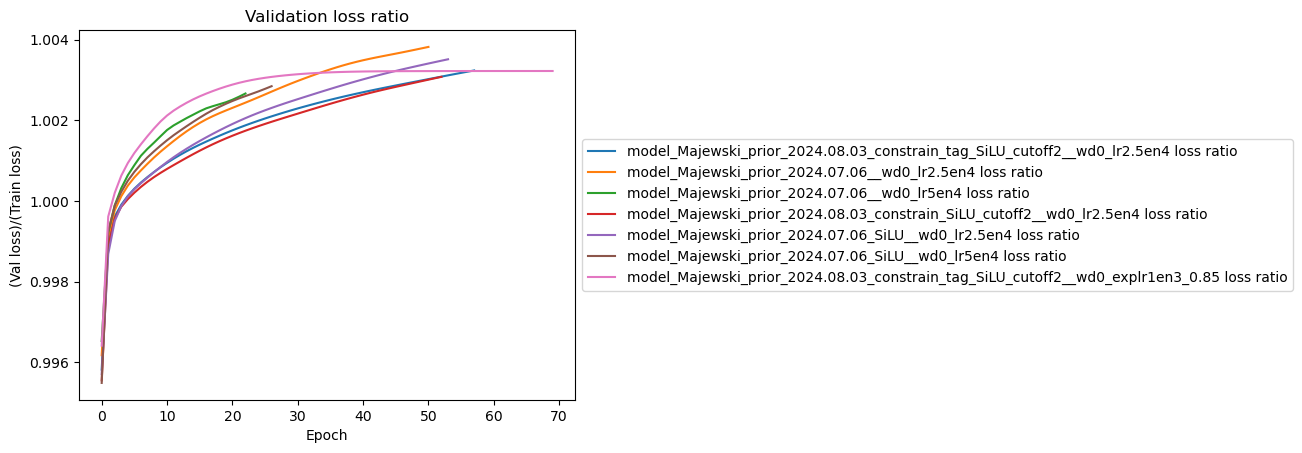

In [14]:
for history in data:
    loss_ratio = np.array(history['val'])/  np.array(history['train'])

    plt.plot(loss_ratio, label=f"{history['name']} loss ratio")

plt.xlabel("Epoch")
plt.ylabel("(Val loss)/(Train loss)")
plt.title(f"Validation loss ratio")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pass